In [ ]:
# Importing libraries.
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read the datasets
dataset=pd.read_csv("XAPI-Edu-Data.csv")

In [10]:
#Check the dataset
dataset.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [11]:
#Converting alphabetical values to numerical values
dataset = dataset.dropna()
print("Old shape :" ,dataset.shape)

dataset['gender'].replace({'M': 0, 'F': 1},inplace = True)
dataset['StageID'].replace({'lowerlevel': 0, 'MiddleSchool': 1 , 'HighSchool':2},inplace = True)
dataset['ParentschoolSatisfaction'].replace({'Good': 0, 'Bad': 1},inplace = True)
dataset['ParentAnsweringSurvey'].replace({'Yes': 0, 'No': 1},inplace = True)
dataset['StudentAbsenceDays'].replace({'Under-7': 0, 'Above-7': 1},inplace = True)
dataset['Relation'].replace({'Father': 0, 'Mum': 1},inplace = True)
dataset['SectionID'].replace({'A': 0, 'B': 1 , 'C':2},inplace = True)
dataset['Topic'].replace({'IT': 0, 'Chemistry': 1 , 'Geology':2 , 'History' : 3, 'Biology' : 4, 'Arabic':5 , 'French':6 , 'Science' : 7 , 'English' : 8 , 'Math':9,'Quran':10 , 'Spanish':11},inplace = True)
dataset['Semester'].replace({'F': 0, 'S': 1},inplace = True)
dataset['GradeID'].replace({'G-02':2, 'G-04': 4 , 'G-05':5,'G-06':6,'G-07':7 ,'G-08':8,'G-09':9,'G-10':10,'G-11':11,'G-12':12 },inplace = True)
dataset = dataset.drop('NationalITy', axis='columns')
dataset = dataset.drop("PlaceofBirth", axis='columns')
dataset['Class'].replace({'L': 0, 'M': 1 , 'H' :2},inplace = True)

print("New shape :" ,dataset.shape)
print(dataset)

Old shape : (480, 17)
New shape : (480, 15)
     gender  StageID  GradeID  SectionID  Topic  Semester  Relation  \
0         0        0        4          0      0         0         0   
1         0        0        4          0      0         0         0   
2         0        0        4          0      0         0         0   
3         0        0        4          0      0         0         0   
4         0        0        4          0      0         0         0   
..      ...      ...      ...        ...    ...       ...       ...   
475       1        1        8          0      1         1         0   
476       1        1        8          0      2         0         0   
477       1        1        8          0      2         1         0   
478       1        1        8          0      3         0         0   
479       1        1        8          0      3         1         0   

     raisedhands  VisITedResources  AnnouncementsView  Discussion  \
0             15                16

In [12]:
#separating the dependent and independent values....
#X-Independent variable
X = dataset.iloc[:, 0:13].values
print(X)

[[ 0  0  4 ... 20  0  0]
 [ 0  0  4 ... 25  0  0]
 [ 0  0  4 ... 30  1  1]
 ...
 [ 1  1  8 ... 29  1  1]
 [ 1  1  8 ... 57  1  1]
 [ 1  1  8 ... 62  1  1]]


In [13]:
#y-dependent or target variable
y = dataset.iloc[:, 14].values
print(y)

[1 1 0 0 1 1 0 1 1 1 2 1 0 0 2 1 1 1 1 2 1 1 1 0 0 0 1 0 1 1 2 0 0 0 0 0 0
 1 0 1 0 1 0 1 1 0 0 2 2 1 0 0 1 2 0 0 0 0 1 1 0 1 2 1 0 0 1 2 2 1 0 1 0 1
 0 1 1 1 0 2 0 0 0 1 2 0 2 0 0 0 0 2 2 2 0 2 2 1 1 1 1 2 0 0 1 0 1 2 1 1 2
 1 0 0 0 0 1 2 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 2 2 2 1 2 1 0 0 1 2 0 1 2 1
 1 2 2 1 2 0 1 2 1 1 0 1 2 1 2 1 1 2 1 2 2 1 2 1 0 0 1 0 2 1 2 1 2 0 2 1 0
 2 1 1 2 1 0 0 1 1 1 1 2 2 0 1 2 2 1 1 0 2 1 1 1 1 2 1 2 0 0 0 1 1 2 1 1 1
 1 2 2 1 0 0 2 0 1 0 1 1 1 0 0 1 1 2 2 1 0 1 2 1 2 1 0 1 2 0 1 0 2 2 2 1 1
 0 0 1 1 1 1 2 1 1 1 1 2 1 1 2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 1 1 0 0 2 2 1 1
 2 2 1 1 0 0 1 1 1 1 2 2 1 1 1 1 2 2 2 2 2 2 2 2 1 1 0 0 1 1 0 0 1 1 0 0 1
 1 0 0 1 1 1 1 1 1 1 1 2 2 2 2 0 0 0 0 1 1 2 2 1 1 2 2 1 1 2 2 2 2 1 1 2 2
 1 1 0 0 0 0 1 1 0 0 0 0 2 2 2 2 1 1 0 0 1 1 2 2 2 2 1 1 2 2 1 1 2 2 2 2 0
 0 1 1 2 2 1 1 0 0 2 2 2 2 2 2 1 1 2 2 1 1 0 0 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 2 2 2 2 1 1 1 1 2 2 2 2 1 1 1 1 2 2 2 2 0 0 1 1 1 1 0 0 1 1 0 0]


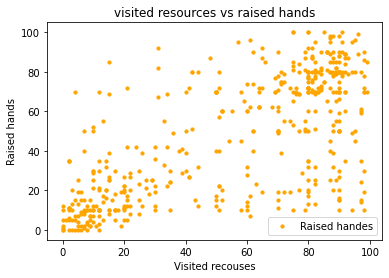

In [14]:
#Plot Visited recourses vs Raised hands ............
Vrecourses = dataset.iloc[: , 8].values
Rhands = dataset.iloc[: , 7].values
plt.scatter(Vrecourses , Rhands , label='Raised handes', color='Orange' , s=10)
plt.xlabel('Visited recouses')
plt.ylabel('Raised hands')
plt.title('visited resources vs raised hands')
plt.legend(loc="lower right")
plt.show()

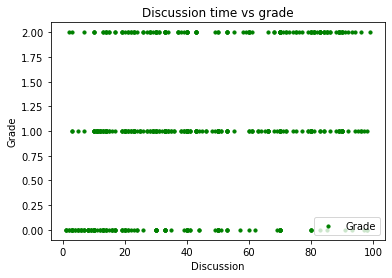

In [15]:
#Plot Discussion vs Grade............
Discussion = dataset.iloc[: , 10].values
plt.scatter(Discussion , y , label='Grade' , color='Green' , s=10)
plt.xlabel('Discussion')
plt.ylabel('Grade')
plt.title('Discussion time vs grade')
plt.legend()
plt.show()

In [16]:
#initating the training and the testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)

In [17]:
#linear regression model (-1)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [116]:
#RandomForestClassifier model (0.65)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [235]:
# KNN (0.66)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=12)
neigh.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=12)

In [228]:
#logistic regression model (0.72)
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1300)
# max_iter: Maximum number of iterations taken for the solvers to converge. default=100

logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1300)

In [156]:
#SVM model (0.6)
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, y_train)

SVC()

In [231]:
#naive bayes model (0.68)
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

GaussianNB()

In [218]:
#neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1300)
mlp.fit(X_train,y_train)

MLPClassifier(max_iter=1300)

In [142]:
#decision tree model (0.65)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train , y_train )

DecisionTreeClassifier()

In [150]:
#gradient boosting classifier model (0.6)
from sklearn.ensemble import GradientBoostingClassifier
Gboost = GradientBoostingClassifier()
Gboost.fit(X_train , y_train)

GradientBoostingClassifier()

In [236]:
#predicting the test set
y_pred = neigh.predict(X_test)

In [130]:
print( len(X_train) )
print( len(X_test) )
print( len(y_train) )
print( len(y_test) )

384
96
384
96


In [172]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

Mean absolute error: 0.44


In [173]:
# Mean squared error
from sklearn.metrics import mean_squared_error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.50


In [222]:
# Evaluate the model
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

Accuracy : 0.6354166666666666


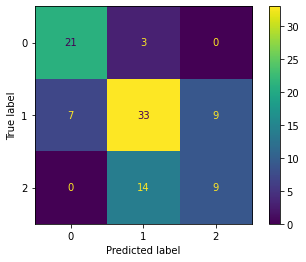

In [238]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [237]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        24
           1       0.66      0.67      0.67        49
           2       0.50      0.39      0.44        23

    accuracy                           0.66        96
   macro avg       0.64      0.65      0.64        96
weighted avg       0.64      0.66      0.65        96

